In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter("ignore")

In [96]:
data = pd.read_csv(R"C:\Users\dedee\Downloads\jfk_weather_cleaned.csv")

In [98]:
data.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [99]:
data.shape

(75083, 11)

In [100]:
data.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [101]:
data.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000
mean,9.211896,55.355527,49.327544,42.424024,64.812075,11.253240,196.550751,30.005579,30.026049,0.005478
std,2.202311,17.394334,16.182867,19.577957,19.898962,6.101048,107.692804,0.235172,0.234069,0.036161
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,0.000000,28.520000,28.540000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,110.000000,29.860000,29.880000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,200.000000,30.000000,30.020000,0.000000
75%,10.000000,70.000000,64.000000,59.000000,82.000000,15.000000,290.000000,30.150000,30.170000,0.000000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,30.850000,2.410000


# There are no missing values.

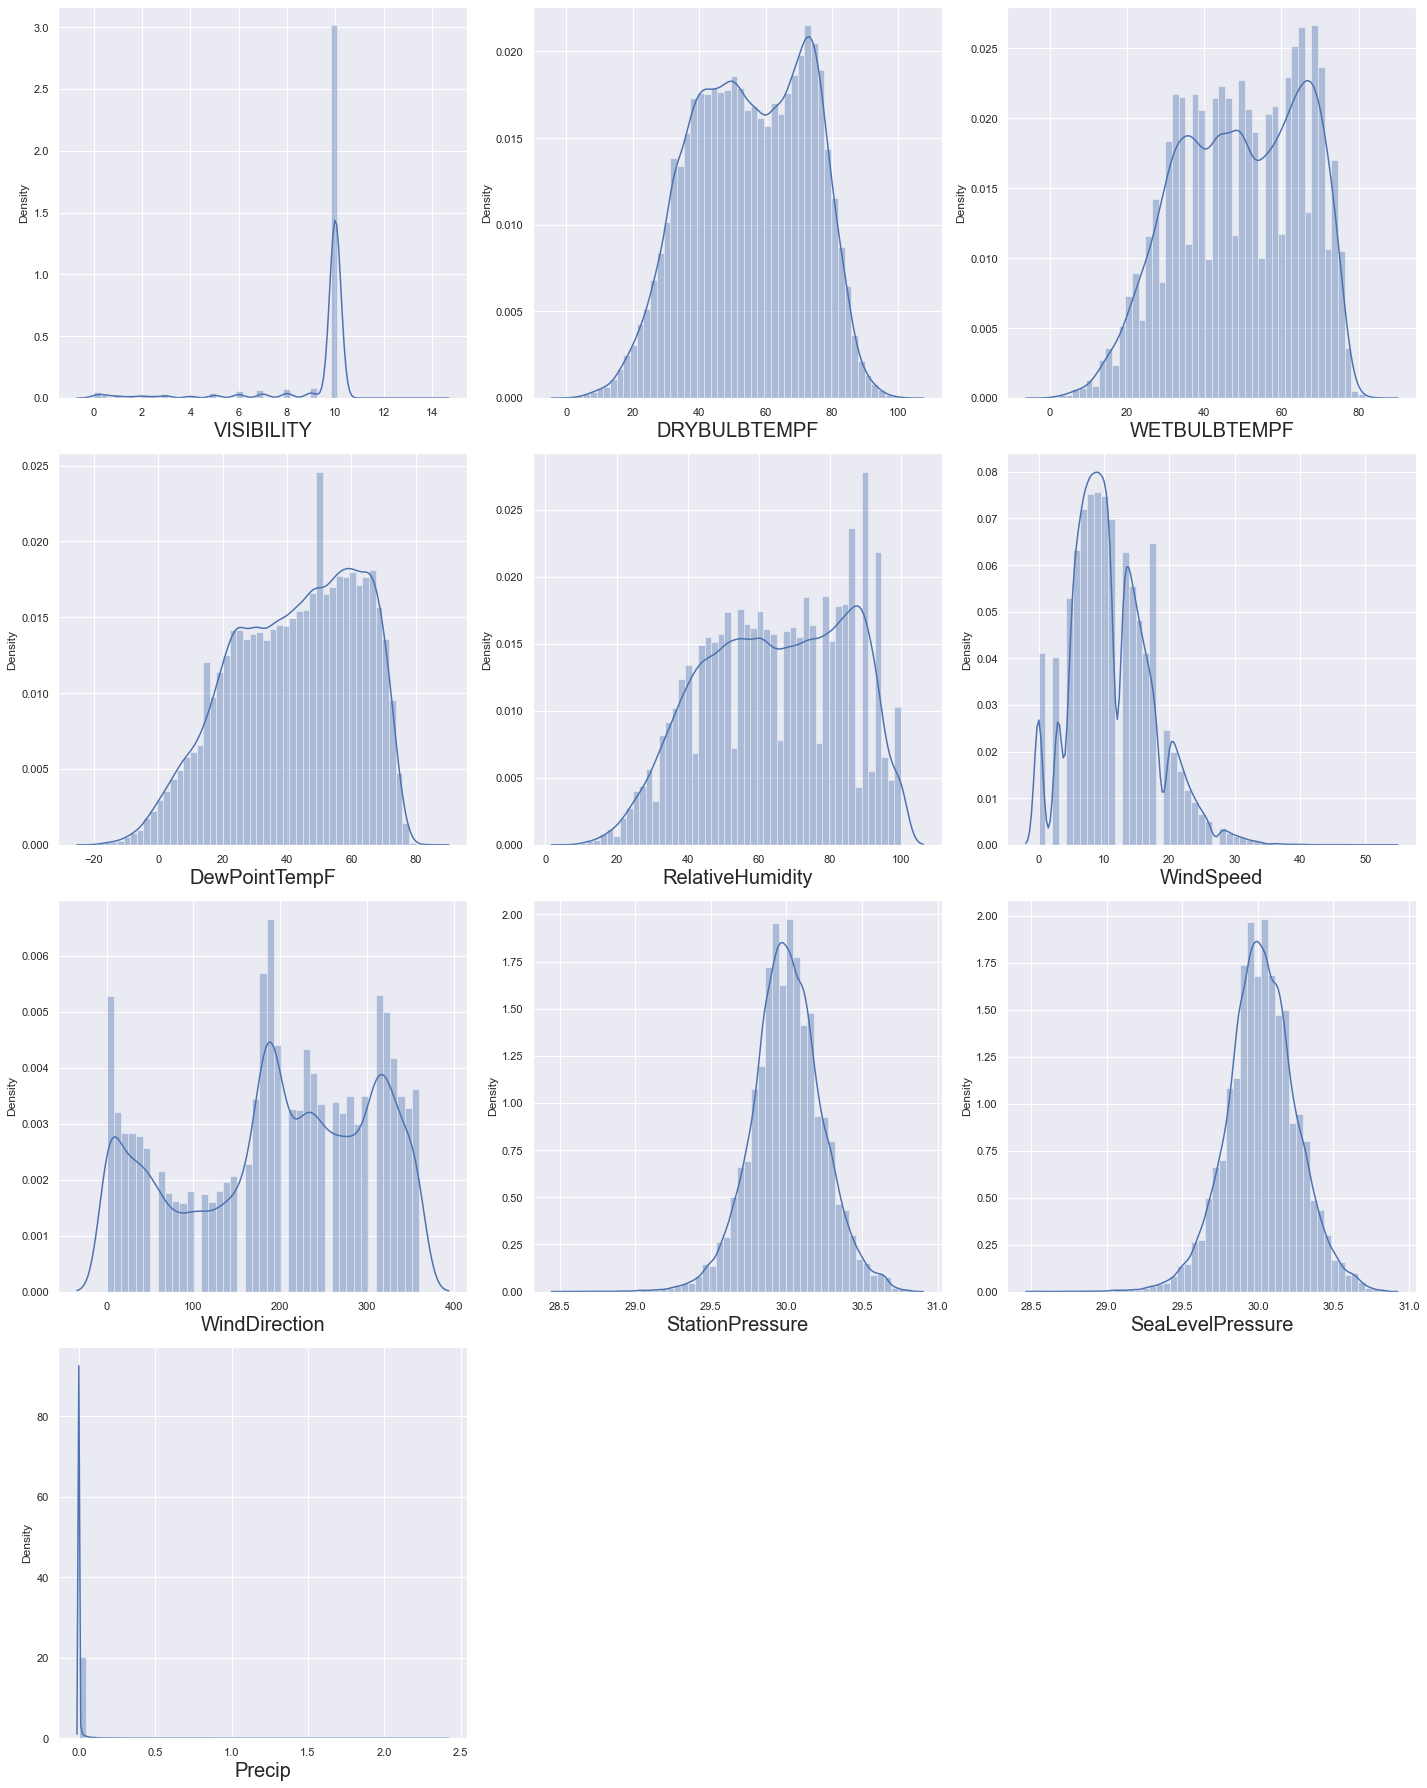

In [102]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# let's scale our data

In [103]:
scale = StandardScaler()

In [104]:
X = data.drop(['DATE','VISIBILITY'],axis=1)
y = data['VISIBILITY']

In [105]:
X_scaled = scale.fit_transform(X)

In [106]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [107]:
X_scaled.describe()

,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04
mean,-2.413982e-15,-2.010512e-15,-2.679528e-14,1.252707e-15,2.171260e-15,3.301717e-15,-5.483315e-14,-1.423422e-15,-8.783367e-15
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.124919e+00,-3.109948e+00,-3.137428e+00,-2.855046e+00,-1.844489e+00,-1.825118e+00,-6.317020e+00,-6.348814e+00,-1.514946e-01
25%,-7.678141e-01,-8.235644e-01,-7.878313e-01,-7.946234e-01,-6.971373e-01,-8.036872e-01,-6.190362e-01,-6.239605e-01,-1.514946e-01
50%,3.705101e-02,4.155384e-02,8.049800e-02,5.969825e-02,-2.054152e-01,3.202881e-02,-2.372442e-02,-2.584147e-02,-1.514946e-01
75%,8.419161e-01,9.066721e-01,8.466709e-01,8.637657e-01,6.141216e-01,8.677448e-01,6.141096e-01,6.150004e-01,-1.514946e-01
max,2.681608e+00,2.204349e+00,2.123626e+00,1.768341e+00,6.842602e+00,1.517746e+00,3.505624e+00,3.520150e+00,6.649481e+01


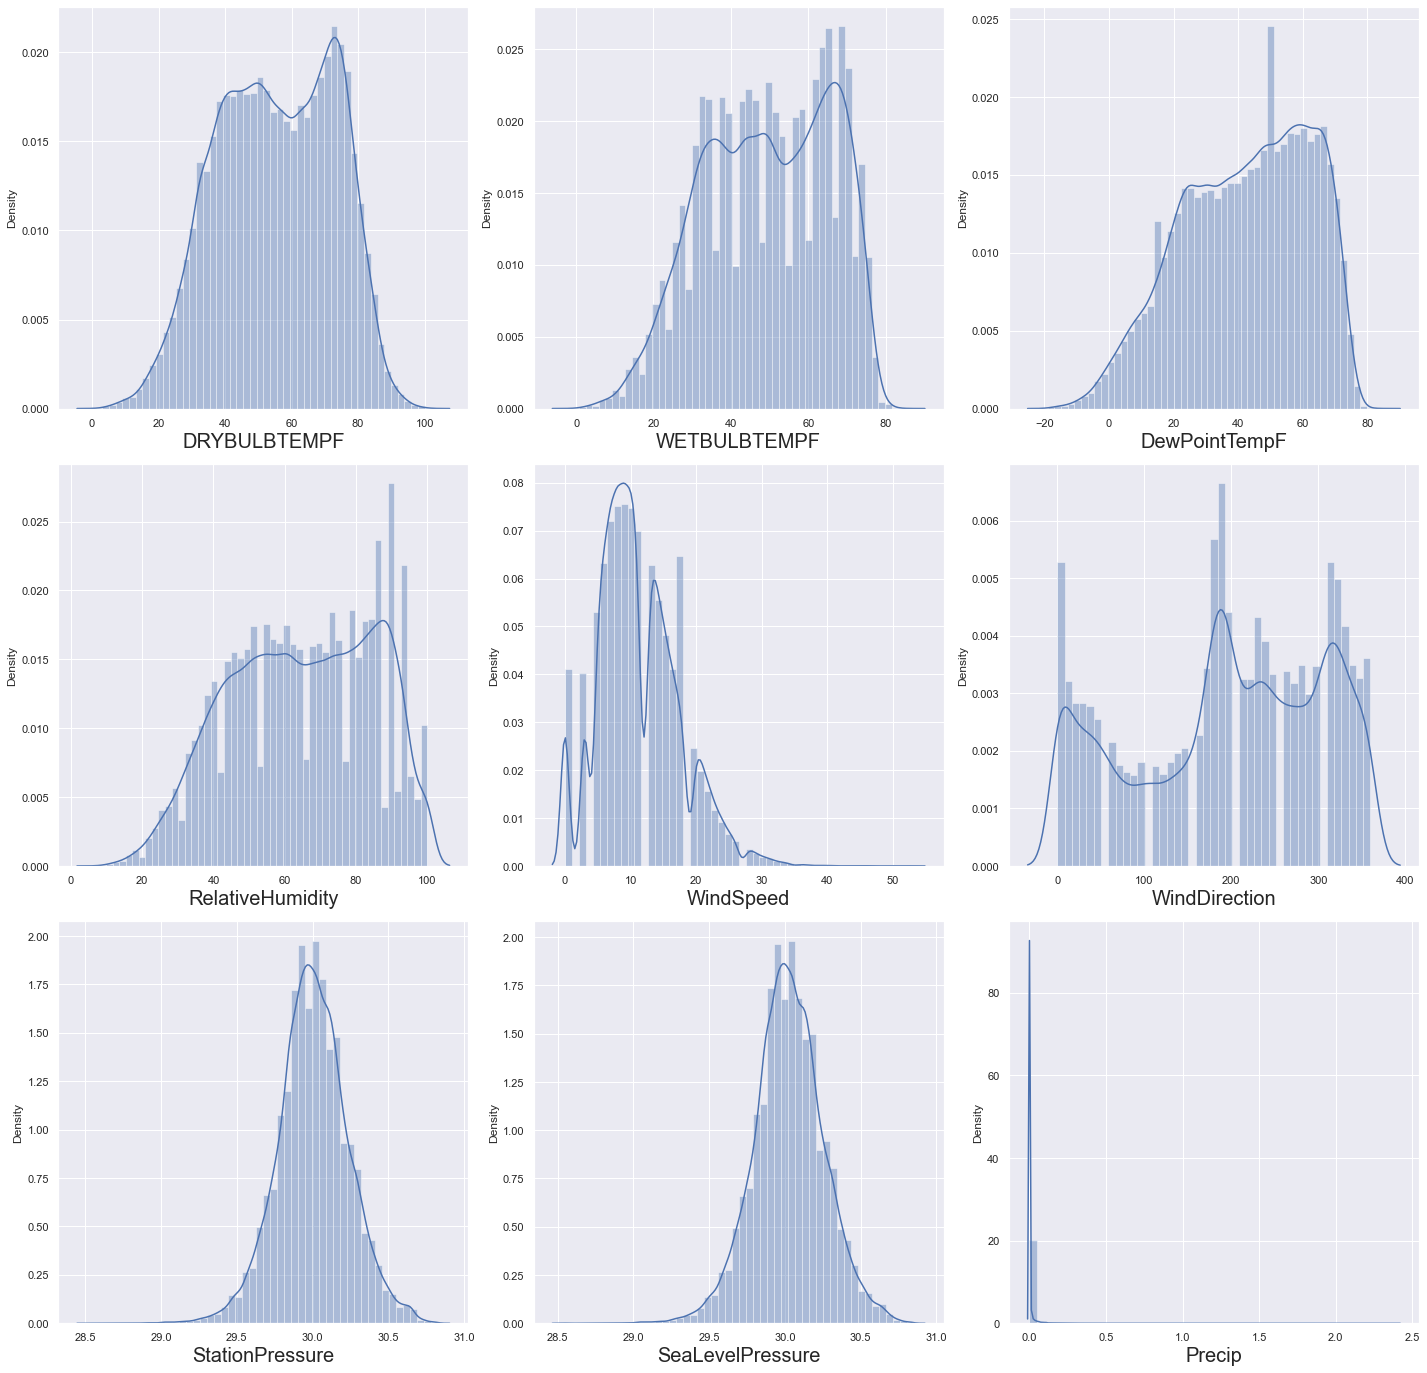

In [108]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_scaled:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# We can see some columns are not following normal distribution.

# we will use such algorithms which do not require normal distribution such as decision tree and XGBoost.

# Also, precipitation column has most of data value near 0. It won't be very useful for our analysis. 
# Let's drop this column.

# Let's check correlation between the columns :

<AxesSubplot:>

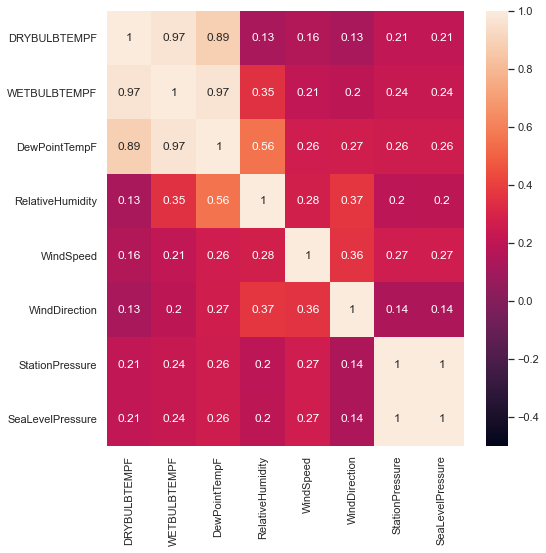

In [109]:
plt.figure(figsize=(8,8))
plt_data =X.drop(['Precip'],axis=1)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) 

# There is clear correaltion between some columns.

# Let's drop the columns with high correlaion.

In [110]:
X_ = X.drop(['WETBULBTEMPF','DewPointTempF','StationPressure','Precip'],axis=1)

<AxesSubplot:>

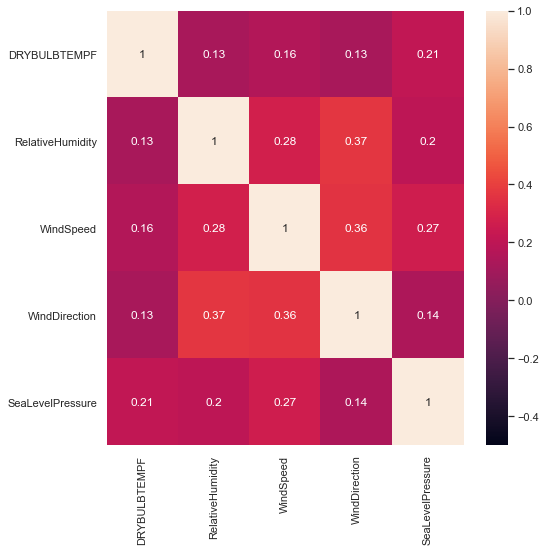

In [111]:
plt.figure(figsize=(8,8))
plt_data =X_
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [115]:
X_['Labels']=y

In [116]:
x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.25, random_state=555)

In [190]:
%%time

RF = RandomForestRegressor(n_estimators = 130, random_state=555)
KNC = KNeighborsRegressor()
DTC = DecisionTreeRegressor()
ABC = AdaBoostRegressor(n_estimators = 100)
BC = BaggingRegressor(n_estimators = 100)
GBC = GradientBoostingRegressor(n_estimators = 100)
clf_XGB = XGBRegressor(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([RF,KNC,DTC, ABC, BC, GBC,clf_XGB],
                      ['Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, x_train, y_train, cv=5, scoring="r2")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(x_train, y_train)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.r2_score(y_test,clf.predict(x_test))))

5-fold cross validation:

Train CV Accuracy: 0.561 (+/- 0.020) [Random Forest]
Test Accuracy: 0.5899 
Train CV Accuracy: 0.455 (+/- 0.021) [KNeighbors]
Test Accuracy: 0.4751 
Train CV Accuracy: 0.173 (+/- 0.033) [Decision Tree]
Test Accuracy: 0.2165 
Train CV Accuracy: 0.415 (+/- 0.018) [Ada Boost]
Test Accuracy: 0.4377 
Train CV Accuracy: 0.561 (+/- 0.020) [Bagging]
Test Accuracy: 0.5899 
Train CV Accuracy: 0.530 (+/- 0.021) [Gradient Boosting]
Test Accuracy: 0.5503 
Train CV Accuracy: 0.536 (+/- 0.026) [XGBoost]
Test Accuracy: 0.5767 
Wall time: 44.8 s


# It is Evident from above results Ensembles have better accuracy than trees and Neighbors. so i would like to work with bagging and xgboost to improve the model.

In [197]:


%%time
n_samples = cluster_features.shape[0]
n_features = cluster_features.shape[1]
params = {'base_estimator': [None, DecisionTreeRegressor(),LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0, n_samples//2,],
          'max_features': [0.5,1.0, n_features//2,],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=5, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(x_train, y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(x_train, y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(x_test, y_test))
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Train R^2 Score : 0.885
Test R^2 Score : 0.593
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 14592, 'n_estimators': 100}
Wall time: 11min 52s


In [196]:
param_grid_xgboost = {

                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5, 10, 20],
                'n_estimators': [10, 50, 100, 200]
}
# Creating an object of the Grid Search class
grid= GridSearchCV(XGBRegressor(objective='reg:linear'),param_grid_xgboost, verbose=3,cv=5)
# finding the best parameters
grid.fit(x_train, y_train)

# extracting the best parameters
learning_rate = grid.best_params_['learning_rate']
max_depth = grid.best_params_['max_depth']
n_estimators = grid.best_params_['n_estimators']

# creating a new model with the best parameters
xgb = XGBRegressor(objective='reg:linear',learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
# training the mew model
xgb.fit(x_train, y_train)
prediction_xgboost = xgb.predict(x_test)  # Predictions using the XGBoost Model
prediction_xgboost_error = r2_score(y_test,prediction_xgboost)
print("Accuracy r2_score is {}".format(prediction_xgboost_error))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[14:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[14:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[14:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10; total time=   0.0s
[14:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:s

[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=100; total time=   0.4s
[14:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=100; total time=   0.4s
[14:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=100; total time=   0.4s
[14:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=100; total time=   0.4s
[14:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now depre

[CV 4/5] END learning_rate=0.5, max_depth=20, n_estimators=10; total time=   0.4s
[14:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 5/5] END learning_rate=0.5, max_depth=20, n_estimators=10; total time=   0.5s
[14:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=50; total time=   2.4s
[14:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=50; total time=   2.4s
[14:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now depre

[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s
[14:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s
[14:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.4s
[14:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s
[14:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now depre

[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   0.7s
[14:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   0.6s
[14:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=50; total time=   0.6s
[14:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=100; total time=   1.2s
[14:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now depr

[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200; total time=  13.4s
[14:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[14:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[14:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[14:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now depr

[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.4s
[14:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.4s
[14:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.4s
[14:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.4s
[14:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now d

[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=10; total time=   0.2s
[14:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=10; total time=   0.2s
[14:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=50; total time=   1.1s
[14:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=50; total time=   1.4s
[14:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now d

[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.5s
[14:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.5s
[14:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.5s
[14:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=200; total time=   0.5s
[14:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is n

[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=50; total time=   0.5s
[14:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.001, max_depth=10, n_estimators=50; total time=   0.5s
[14:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 5/5] END learning_rate=0.001, max_depth=10, n_estimators=50; total time=   0.4s
[14:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=100; total time=   1.0s
[14:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is 

[CV 5/5] END learning_rate=0.001, max_depth=20, n_estimators=200; total time=   4.9s
[14:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy r2_score is 0.5810809480328913


# BAGGING has better score among all the models. Because of less features the model score is comparitively low. 